In [47]:
import pandas as pd
pd.set_option('display.max_columns', None)
from collections import Counter
from matplotlib import pyplot as plt
from IPython.display import clear_output

In [4]:
df = pd.read_csv('./data/all_petitions_comments_20211026-132241.csv')

In [6]:
users = df['user.id']

(array([1.4549e+04, 1.1000e+01, 4.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([  1. ,  14.4,  27.8,  41.2,  54.6,  68. ,  81.4,  94.8, 108.2,
        121.6, 135. ]),
 <BarContainer object of 10 artists>)

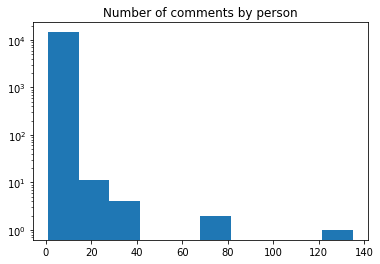

In [19]:
plt.title("Number of comments by person")
plt.hist(list(zip(*Counter(users).most_common()))[1], log=True)

In [30]:
df[df['user.id'] == 8090682].iloc[0]

index                                                                                  2
id                                                                             800250390
comment                                "Men of this world, think about it! A woman br...
parent_id                                                                              0
children_count                                                                         0
commentable_type                                                                   Event
commentable_id                                                                  20201430
likes                                                                                  0
role                                                                             comment
created_at                                                          2020-07-22T06:51:51Z
deleted_at                                                                           NaN
user.id              

In [45]:
both_user = []
for user, group in df.groupby('user.id'):
    num_petitions = len(set(group['commentable_entity.slug']))
    num_statuses = len(set(group['status_manual']))
    status_counter = Counter(group['status_manual'])
    if num_statuses != 1:
        print(user, num_petitions, num_statuses, status_counter)
        both_user.append(user)

8090682 34 3 Counter({'against': 19, 'for': 15, 'related': 1})
43698145 17 3 Counter({'against': 13, 'for': 2, 'related': 2})
577958717 15 2 Counter({'against': 14, 'for': 1})
822514252 2 2 Counter({'for': 1, 'against': 1})
847847951 2 2 Counter({'against': 1, 'for': 1})
862316086 2 2 Counter({'related': 1, 'against': 1})
943100372 135 3 Counter({'against': 133, 'related': 1, 'for': 1})
948054032 7 2 Counter({'for': 8, 'related': 1})
971175292 3 2 Counter({'for': 2, 'related': 1})
1129808400 5 2 Counter({'for': 4, 'related': 1})
1147769169 2 2 Counter({'against': 1, 'for': 1})
1162497857 2 2 Counter({'for': 1, 'against': 1})
1180206242 3 2 Counter({'against': 2, 'related': 1})
1184978289 19 2 Counter({'against': 18, 'related': 1})
1213338469 25 2 Counter({'against': 24, 'for': 1})


In [50]:
for u in both_user:
    try:
        z = df[df['user.id'] == u][['comment', 'status_manual']]
        c_for = z[z['status_manual'] == 'for'].comment.iloc[0]
        c_against = z[z['status_manual'] == 'against'].comment.iloc[0]
        print(c_for)
        print("\n\n==========\n\n")
        print(c_against)
        input()
        clear_output()
    except:
        pass

In [51]:
# doesn't seem to have people supporting both sides